<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

Содержание:

1.	Подготовка данных\

   1.1.	Загрузка данных
   
   1.2.	Проверка корректности расчёта эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Определение MAE между расчётами и значением признака.
   
   1.3.	 Анализ признаков, недоступных в тестовой выборке.
   
   1.4.	Проверка качества данных. Проверить и обработать пропуски
   
2.	Анализ данных

   2.1.	Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
   
   2.2.	Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.
   
   2.3.	Иследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
   
3.	Модель\
   3.1. Выбор модели\
   3.2. Моделирование выбранной моделью\
   3.3. Сравнение с константной моделью DummyRegressor.
   
   ____

# Проект

# Улучшение процесса обогащения золота
___

# Описание проекта

Заказчик проекта - компания «Цифра». Компания разрабатывает решения для эффективной работы промышленных предприятий. [Zyfra WebSite](https://www.zyfra.com/)

Требуется разработать модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды используя данные с параметрами добычи и очистки. 
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
___

# Данные

В нашем распоряжении находятся данные с параметрами добычи и очистки.

Данные находятся в трёх файлах:
•	gold_recovery_train_new.csv — обучающая выборка;
•	gold_recovery_test_new.csv — тестовая выборка;
•	gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, необходимо проверить их на корректность согласно согласованной с заказчиком инструкции.


## Наименование признаков

Наименование признаков строится по следующему правилу:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:

•	**rougher** — флотация  
•	**primary_cleaner** — первичная очистка  
•	**secondary_cleaner** — вторичная очистка  
•	**final** — финальные характеристики  

Возможные значения для блока `[тип_параметра]`:

•	**input** — параметры сырья  
•	**output** — параметры продукта  
•	**state** — параметры, характеризующие текущее состояние этапа  
•	**calculation** — расчётные характеристики

___

# План работы

План работы
1. Загрузить библиотеки.


2. Подготовка данных  
    2.1. Открыть и изучить файлы.  
    2.2. Провести предобработку данных. Убрать или заменить пропуски, привести данные к нужным типам.  
    2.3. Проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти МАЕ между расчитанным и имеющимся значением признака. Описать выводы.  
    2.4. Проанализировать признаки, недоступные в тестовой выборке. Что это за параметры?

3. Проанализировать данные  
    3.1. Изучить, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Описать выводы.  
    3.2. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
    3.3. Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом ифинальном концентратах.
    Проверить, есть ли аномальные значения в суммарном распределении. Определить, если они есть, следует ли их удалять из обеих
    выборок? Описать выводы и удалить аномалии в соответствии с принятыми правилами, если найдутся.  


4. Построить модель  
    4.1. Написать функцию для вычисления итоговой sMAPE.  
    4.2. Обучить разные модели и оценить их качество кросс-валидацией.  
    4.3. Выбрать лучшую модель и проверить её на тестовой выборке.  
    4.4. Описать выводы.  

___

# Формулы

Для вычесления метрик качетсва треьуется использовать следующие формулы.

Эффективность обогащения:

$$
Recovery=\frac{C*(F-T)}{F*(C-T)} * 100\%
$$

где: 

•	C — доля золота в концентрате после флотации/очистки;  
•	F — доля золота в сырье/концентрате до флотации/очистки;  
•	T — доля золота в отвальных хвостах после флотации/очистки.  




Для решения задачи введём новую метрику качества — **sMAPE** (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. sMAPE одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:

$$
sMAPE=\frac{1}{N}\sum_{i=1}^N \frac{|y_i - y_i'|}{(|y_i| + |y_i'|)/2} * 100\%
$$

где:  

•	y_i — значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.  
•	y_i' — значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.  
•	N — количество объектов в выборке.  




Нужно спрогнозировать сразу две величины эффективности обогащения:
1.	эффективность обогащения чернового концентрата `rougher.output.recovery`;
2.	эффективность обогащения финального концентрата `final.output.recovery`.


Итоговая метрика sMAPE складывается из двух величин:

$$
Итоговое\_sMAPE = 25\% * sMAPE(rougher) + 75\% * sMAPE(final)
$$


# 1. Загрузка библиотек

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

#import grafics
import matplotlib.pyplot as plt
import pylab as pl

#import sklearn
from sklearn.metrics import mean_absolute_error #for MAE
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

#to display all rows and columns
from IPython.display import display, HTML 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

print('Importing libraries - OK')

Importing libraries - OK


Необходимые библиотеки загружены.

# 2. Подготовка данных

2.1. Открыть и изучить файлы.  
2.2. Провести предобработку данных. Убрать или заменить пропуски, привести данные к нужным типам.  
2.3. Проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти МАЕ между расчитанным и имеющимся значением признака. Описать выводы.  
2.4. Проанализировать признаки, недоступные в тестовой выборке. Что это за параметры?

### 2.1. Открыть и изучить файлы.  

In [2]:
#df_train_raw = pd.read_csv('/datasets/gold_recovery_train_new.csv') 
#df_test_raw = pd.read_csv('/datasets/gold_recovery_test_new.csv') 
#df_full_raw = pd.read_csv('/datasets/gold_recovery_full_new.csv') 

df_train_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Сборный 2. Машинное обучение\\gold_recovery_train_new.csv')
df_test_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Сборный 2. Машинное обучение\\gold_recovery_test_new.csv')
df_full_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Сборный 2. Машинное обучение\\gold_recovery_full_new.csv')

print('df_train_raw shape ', df_train_raw.shape)
print('df_test_raw shape', df_test_raw.shape)
print('df_full_raw shape', df_full_raw.shape)

df_train_raw shape  (14149, 87)
df_test_raw shape (5290, 53)
df_full_raw shape (19439, 87)


Файлы загружены. Посмотрим на структуру данных. Если посмотреть на размеры таблиц, то количество строк полной выборки складывается из количества строк обучающей и тестовой выборок. Количество столбцов в обучающей и полной выборках совпадают. В тестовой выборке некоторые столбцы отсутствуют.

In [3]:
print('df_train_raw shape ', df_train_raw.info())
print()
print('df_test_raw shape', df_test_raw.info())
print()
print('df_full_raw shape', df_full_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Вывод описания данных показывает, что:  
1. датасеты содержат пропуски - необходимо их обработать;  
2. формат date не соответствует дате - необходимо привести к нужному формату;  
3. в названиях колонок есть символ '.' . На выходе столбцы должны быть расписаны через точку, так как это нужно инженерам компании заказчика. Оставим как есть.

### 2.2. Провести предобработку данных. Убрать или заменить пропуски, привести данные к нужным типам

In [4]:
#create copy of datasets
df_train = df_train_raw
df_test = df_test_raw
df_full = df_full_raw

Создали копию датасетов для работы

Анализируем и обрабатываем пропуски

In [5]:
print(df_train_raw.isna().sum().sum())
print(df_test_raw.isna().sum().sum())

4100
90


общее количество пропусков в train - 4100 шт, что составляет 28,9% от выборки. Достаточно большое количество. Взаимосвязей в пропусках данных не выявлено, скорее всего технические причины.

Обработка: количество пропусков слишком большое для удаления. В описании проекта указано, что соседние по времени параметры часто похожи. Это даёт основание заменить пропуски предыдущим по времени значением.

In [6]:
df_train = df_train.ffill(axis = 0)
df_test = df_test.ffill(axis = 0)

print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


Пропуски заполнены предыдщим значением

Приведём формат date к нужному

In [7]:
#change data format

df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

print('Дата и формат df_train: ')
display(df_train['date'].head(1))
print()
print('Дата и формат df_test: ')
display(df_test['date'].head(1))
print()
print('Дата и формат df_full: ')
display(df_full['date'].head(1))

Дата и формат df_train: 


0   2016-01-15
Name: date, dtype: datetime64[ns]


Дата и формат df_test: 


0   2016-09-01 00:59:59
Name: date, dtype: datetime64[ns]


Дата и формат df_full: 


0   2016-01-15
Name: date, dtype: datetime64[ns]

Формат даты приведён к datetime64

### 2.3. Проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти МАЕ между расчитанным и имеющимся значением признака. Описать выводы.

План работы:  
1. Рассчитать эффективность обогощения на выборке train
2. Сравнить с df_train_raw['rougher.output.recovery']
3. Сделать выводы

In [8]:
# 1. recovery
c_au = df_train_raw['rougher.output.concentrate_au']  #доля золота в концентрате после флотации/очистки;
f_au = df_train_raw['rougher.input.feed_au'] #доля золота в сырье/концентрате до флотации/очистки;
t_au = df_train_raw['rougher.output.tail_au']  #доля золота в отвальных хвостах после флотации/очистки.

df_train_raw['recovery_au'] = (c_au * (f_au - t_au)) / (f_au * (c_au - t_au)) * 100

In [9]:
# 2. compare with df_train_raw['rougher.output.recovery'] with MAE
print('Среднее абсолютно отклонение MAE для рассчитанной эффективности обогащение и существующей')
mean_absolute_error(df_train_raw['rougher.output.recovery'] , df_train_raw['recovery_au'])

Среднее абсолютно отклонение MAE для рассчитанной эффективности обогащение и существующей


9.73512347450521e-15

Среднее абсолютно отклонение MAE практически равно нулю. Следовательно, данные подходят для дальнейшего анализа

### 2.4. Проанализировать признаки, недоступные в тестовой выборке. Что это за параметры?

Исследование, недоступных в тестовой выборке данных проведено в Экселе.

В тестовой выборке отсутствуют данные:
1. параметры продукта и хвостов (rougher.output. ...), а также эффективности обогащения после флотации  - целевой признак
2. расчётные характеристики после флотации (rougher.output.concentrate_..)
3. параметры продукта и хвостов после первичной очистки (primary_cleaner.output. ...) 
4. параметры хвостов после вторичной очистки (secondary_cleaner.output.tail_..)
5. параметры финального продукта концентрата (final.output.concentrate_..)  и хвостов (final.output.tail_..)
6. эффективность обогащения финального продукта (final.output.recovery)  - целевой признак

В выборке Train представленны только входные данные и отсутвуют итоговые и расчётные данные, которые появляются в результате завершения каждого этапа.

Dataset df_full_raw хранит все данные из выборок train и test


____

## 3. Анализ данных

### 3.1. Изучить, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Описать выводы.

Каждый этап имеет свои результаты. Результаты этапов собраны с ледующих признаках:
1. Флотация вход:  rougher.input.feed_..
2. Черновой концентрат: rougher.output.concentrate_..
3. Первичная очистка: primary_cleaner.output.concentrate_..
3. Финанльный концентрат: final.output.concentrate_..

Отобразим на графиках концентрацию на каждом этапе по каждому металлу. Тип графика - гистограмма

Проверим значения методом describe для выявления аномалий и определить какой вариант усреднения взять

In [10]:
print('Значения Au')
print(df_train['rougher.input.feed_au'].describe())
print()
print('Значения Ag')
print(df_train['rougher.input.feed_ag'].describe())
print()
print('Значения Pb')
print(df_train['rougher.input.feed_pb'].describe())

Значения Au
count    14149.000000
mean         7.866577
std          1.919506
min          0.010000
25%          6.596217
50%          7.649138
75%          9.066976
max         13.126043
Name: rougher.input.feed_au, dtype: float64

Значения Ag
count    14149.000000
mean         8.579195
std          1.896284
min          0.010000
25%          7.132802
50%          8.156092
75%          9.918304
max         14.596026
Name: rougher.input.feed_ag, dtype: float64

Значения Pb
count    14149.000000
mean         3.505465
std          1.090064
min          0.010000
25%          2.766515
50%          3.414267
75%          4.220115
max          7.142594
Name: rougher.input.feed_pb, dtype: float64


т.к. разброс значений достаточно большой, усреднять будем меданой

Создадим функцию для медиан по каждому металлу c графиками

In [11]:
def medians(material):
    stage_1 = df_train['rougher.input.feed_' + material].median()
    stage_2 = df_train['rougher.output.concentrate_' + material].median()
    stage_3 = df_train['primary_cleaner.output.concentrate_' + material].median()
    stage_4 = df_train['final.output.concentrate_' + material].median()
    
    df_concentrate = pd.DataFrame(
        {
            'Stage_name': [
                'rougher_input_'+ material,
                'rough concentrate_'+ material,
                'primary_cleaner_'+ material,
                'final_concentrate_'+ material,      
            ],
            'Concentrate_'+ material: [
                stage_1,
                stage_2,
                stage_3,
                stage_4,
            ],
        }
    )
    
    
    df_concentrate.plot(
        kind='bar',
        x='Stage_name',
        label='Изменение концентрации металла ' + material,
        grid=True,
        figsize=(7, 3)
    );
    plt.title('Изменение концентрации металла ' + material)
    plt.xlabel('Stage name')
    plt.ylabel('Concentrate, %')
    plt.show()

    display(df_concentrate)
    return

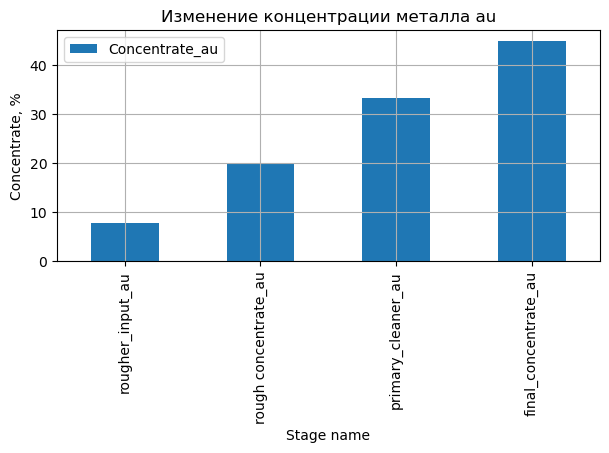

,Stage_name,Concentrate_au
0,rougher_input_au,7.649138
1,rough concentrate_au,19.947312
2,primary_cleaner_au,33.225835
3,final_concentrate_au,44.872436


In [12]:
medians('au')

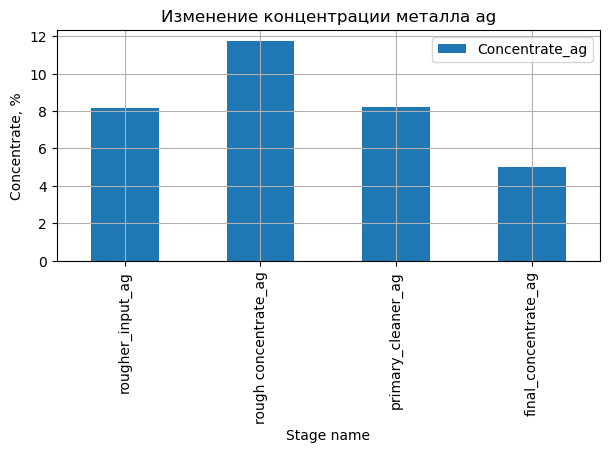

,Stage_name,Concentrate_ag
0,rougher_input_ag,8.156092
1,rough concentrate_ag,11.747362
2,primary_cleaner_ag,8.226247
3,final_concentrate_ag,4.994607


In [13]:
medians('ag')

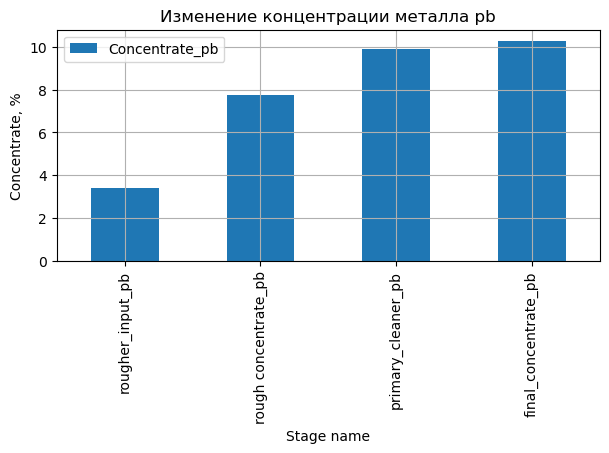

,Stage_name,Concentrate_pb
0,rougher_input_pb,3.414267
1,rough concentrate_pb,7.760435
2,primary_cleaner_pb,9.920598
3,final_concentrate_pb,10.297013


In [14]:
medians('pb')

**Вывод**

Изменение концентрации металла Au : на каждом последующем этапе очистки концентрация металла равномерно увеличивается

Изменение концентрации металла Ag : в черновом концентрате максимальное значение металла. Затем, на каждом последующем этапе очистки концентрация металла равномерно уменьшается.

Изменение концентрации металла Pb : на первых двух этапах очистки концентрация металла равномерно увеличивается. Вторичная очистка практически не влияет на концентрацию, лишь незначительно её увеличивая.


### 3.2. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. 

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
 
Сравнить распределения размеров гранул можно проанализировав форму графиков распределений.

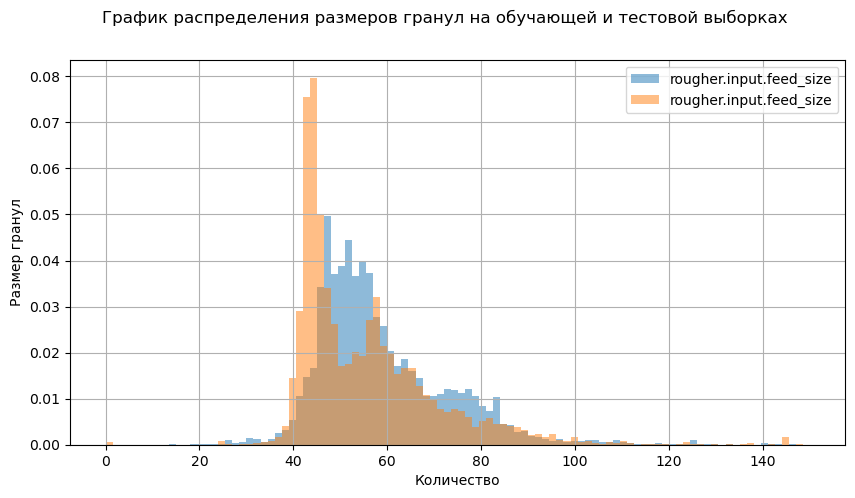

In [15]:
df_train['rougher.input.feed_size'].hist(bins=100, range=(0, 150), figsize=(10, 5), 
                                         legend=True, density=True, alpha=0.5);
df_test['rougher.input.feed_size'].hist(bins=100, range=(0, 150), figsize=(10, 5), 
                                        legend=True, density=True, alpha=0.5);

pl.suptitle('График распределения размеров гранул на обучающей и тестовой выборках');
plt.ylabel('Размер гранул');
plt.xlabel('Количество');

**Вывод**

Распределение у обоих выборок сильно не отличаются друг от друга по форме. Расперделения имеют разную высоту, т.к. в выборках разное количество объектов.

___

## 3.3. Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом ифинальном концентратах. 
Проверить, есть ли аномальные значения в суммарном распределении. Определить, если они есть, следует ли их удалять из обеих выборок? Описать выводы и удалить аномалии в соответствии с принятыми правилами, если найдутся.

**Иследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

План работы:  
1. Рассматриваем 4 стадии: 'rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_'
2. Складываем концентрации на каждом этапе
3. Строим график динамики от этапа к этапу
4. Строим график расперделения суммарной концентрации на каждом этапе

In [16]:
#Складываем концентрации на каждом этапе
#Строим график динамики от этапа к этапу

df_train['df_sum_rouger_input'] = (df_train['rougher.input.feed_au'] 
                             + df_train['rougher.input.feed_ag'] 
                             + df_train['rougher.input.feed_pb'] 
                             + df_train['rougher.input.feed_sol'])

df_train['df_sum_rouger_output'] = (df_train['rougher.output.concentrate_au'] 
                             + df_train['rougher.output.concentrate_ag'] 
                             + df_train['rougher.output.concentrate_pb'] 
                             + df_train['rougher.output.concentrate_sol'])

df_train['df_sum_primary'] = (df_train['primary_cleaner.output.concentrate_au'] 
                             + df_train['primary_cleaner.output.concentrate_ag'] 
                             + df_train['primary_cleaner.output.concentrate_pb'] 
                             + df_train['primary_cleaner.output.concentrate_sol'])

df_train['df_sum_final'] = (df_train['final.output.concentrate_au'] 
                             + df_train['final.output.concentrate_ag'] 
                             + df_train['final.output.concentrate_pb'] 
                             + df_train['final.output.concentrate_sol'])

In [17]:
#функция для медиан по всем металлам c графиками

def medians_sum():
    stage_1 = df_train['df_sum_rouger_input'].median()
    stage_2 = df_train['df_sum_rouger_output'].median()
    stage_3 = df_train['df_sum_primary'].median()
    stage_4 = df_train['df_sum_final'].median()
    
    df_concentrate = pd.DataFrame(
        {
            'Stage_name': [
                'rougher_input',
                'rough concentrate',
                'primary_cleaner_concentrate',
                'final_concentrate',      
            ],
            'Concentrate': [
                stage_1,
                stage_2,
                stage_3,
                stage_4,
            ],
        }
    )
    
    
    df_concentrate.plot(
        kind='bar',
        x='Stage_name',
        label='Изменение концентрации суммы металлов',
        grid=True,
        figsize=(7, 4)
    );
    plt.title('Изменение концентрации суммы металлов')
    plt.xlabel('Stage name')
    plt.ylabel('Concentrate, %')
    plt.show()

    display(df_concentrate)
    return

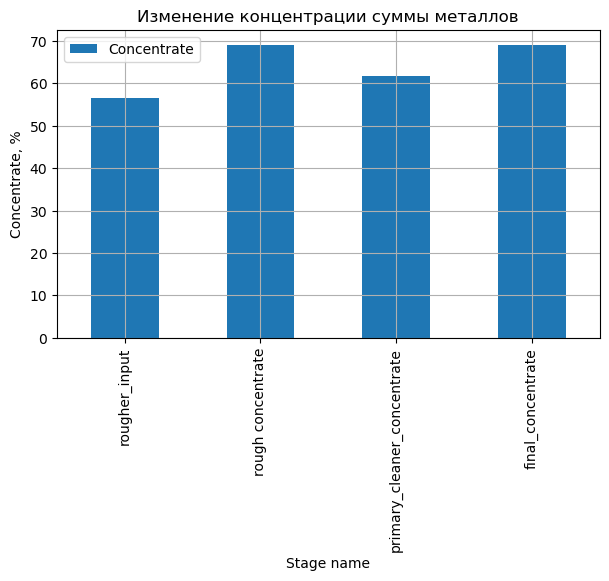

,Stage_name,Concentrate
0,rougher_input,56.627635
1,rough concentrate,69.175663
2,primary_cleaner_concentrate,61.786946
3,final_concentrate,69.141502


In [18]:
medians_sum()

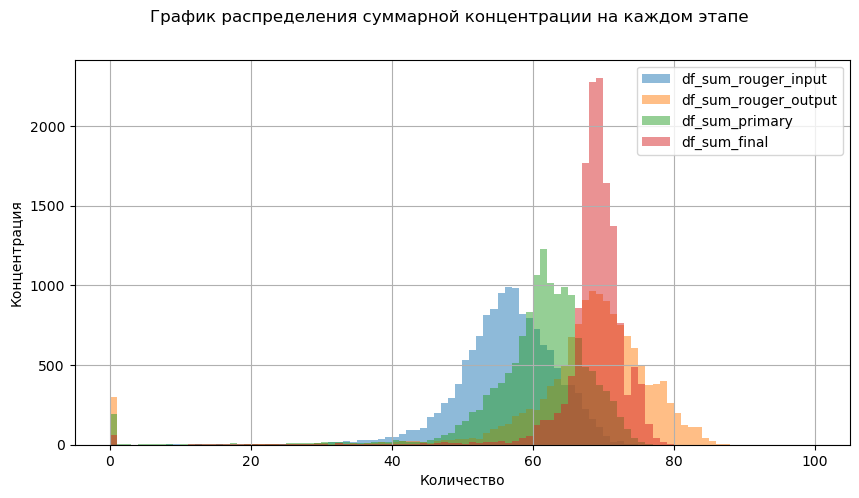

In [19]:
#Строим график расперделения суммарной концентрации на каждом этапе
df_train['df_sum_rouger_input'].hist(bins=100, range=(0, 100), figsize=(10, 5), legend=True, alpha=0.5);
df_train['df_sum_rouger_output'].hist(bins=100, range=(0, 100), legend=True, alpha=0.5);
df_train['df_sum_primary'].hist(bins=100, range=(0, 100), legend=True, alpha=0.5);
df_train['df_sum_final'].hist(bins=100, range=(0, 100), legend=True, alpha=0.5);

pl.suptitle('График распределения суммарной концентрации на каждом этапе');
plt.ylabel('Концентрация');
plt.xlabel('Количество');

**Вывод**

1. Изменение концентрации суммы металлов от этапа к этапу: в среднем, концентрация металлов находится на уровне 65% на каждом этапе. При этом наименбшая концентрация металлов содержится во входящем сырье.
2. Распередения сумм на каждом этапе: все распределения похожи на нормальные. Присутствуют аномальные выборсы около нуля для всех стадий. Ноль может обозначать отсутствие элемента, что не очень правдоподобно. Околонулевые больше похоже на правду и их можно оставить.

Удаляем нулевые значения

In [20]:
#удаление нулевых значений

print('Количество строк до удаления: ', df_train.shape)
print()

df_train = df_train.query('df_sum_rouger_input > 0.5')
df_train = df_train.query('df_sum_rouger_output > 0.5')
df_train = df_train.query('df_sum_primary > 0.5')
df_train = df_train.query('df_sum_final > 0.5')

print('Количество строк после удаления: ', df_train.shape)

Количество строк до удаления:  (14149, 91)

Количество строк после удаления:  (13600, 91)


___

## 4. Построить модель  

### 4.1. Написать функцию для вычисления итоговой sMAPE.

Напишем функцию для расчёта sMAPE и финального sMAPE

In [21]:
#sMAPE функция

#функция для sMAPE
def smape(target_true, target_predictions):
    numerator = np.abs(target_true - target_predictions)
    denominator = (np.abs(target_true) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_true) * np.sum(numerator / denominator) * 100 
 
#функция для итогового sMAPE
def final_smape(smape_rough, smape_final):
     return 0.25 * smape_rough + 0.75 * smape_final
    
#scorer. Дальше этот scorer используется в метриках качества кросс-валидации.
scorer = make_scorer(smape, greater_is_better=False)

#sMAPE функция

#функция для sMAPE
def smape(target_true, target_predictions):
    numerator = np.abs(target_true - target_predictions)
    denominator = (np.abs(target_true) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_true) * np.sum(numerator / denominator) * 100 

#функция для итогового sMAPE

def final_smape(smape_rough, smape_final):
     return 0.25 * smape_rough + 0.75 * smape_final

#scorer. Дальше этот scorer используется в метриках качества кросс-валидации.
scorer = make_scorer(smape, greater_is_better=False)

Выделяем целевые признаки и признаки

1. фичи для rough и final должны соответсвовать тестовой выборке - создать датасет для train rough и для train final
2. фичи в тренировочной выборке должны быть такими же как и в тестовой выборке, т.к. в реальности будет набор данных как в тестовой
3. в тестовую выборку нужно добавить трагеты и недостающие признаки

In [22]:
#dataset train rough
df_train_rough = df_train [['date', 
                               'rougher.input.feed_ag',
                               'rougher.input.feed_pb',
                               'rougher.input.feed_rate',
                               'rougher.input.feed_size',
                               'rougher.input.feed_sol',
                               'rougher.input.feed_au', 
                               'rougher.input.floatbank10_sulfate',
                               'rougher.input.floatbank10_xanthate',
                               'rougher.input.floatbank11_sulfate',
                               'rougher.input.floatbank11_xanthate',
                               'rougher.state.floatbank10_a_air',
                               'rougher.state.floatbank10_a_level',
                               'rougher.state.floatbank10_b_air',
                               'rougher.state.floatbank10_b_level',
                               'rougher.state.floatbank10_c_air',
                               'rougher.state.floatbank10_c_level',
                               'rougher.state.floatbank10_d_air',
                               'rougher.state.floatbank10_d_level',
                               'rougher.state.floatbank10_e_air',
                               'rougher.state.floatbank10_e_level',
                               'rougher.state.floatbank10_f_air',
                               'rougher.state.floatbank10_f_level']]

In [23]:
#dataset train final

df_train_final = df_train[['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level',
                 ]]

In [24]:
features_train_rough = df_train_rough.drop(['date'], axis=1)
features_train_final = df_train_final.drop(['date'], axis=1)
            
target_train_rough = df_train['rougher.output.recovery'].loc[features_train_rough.index]
target_train_final = df_train['final.output.recovery'].loc[features_train_final.index]

В момент предполгаемого применения модели в продакте, доступны только признаки собранные в тестовом датасете. Нужно построить модель работающую только с этими признаками. 
Для обоих этапов нужны только признаки из тестового датасета.

Создаём датасеты для тестовой выборки из full для rough и final

In [25]:
#test

df_test_full = df_test.drop(df_test.columns[1:], axis=1).merge(df_full, on='date', how='left')

df_test_full = df_test_full.dropna()

df_test_rough = df_test_full [['rougher.output.recovery', 
                               'rougher.input.feed_ag',
                               'rougher.input.feed_pb',
                               'rougher.input.feed_rate',
                               'rougher.input.feed_size',
                               'rougher.input.feed_sol',
                               'rougher.input.feed_au', 
                               'rougher.input.floatbank10_sulfate',
                               'rougher.input.floatbank10_xanthate',
                               'rougher.input.floatbank11_sulfate',
                               'rougher.input.floatbank11_xanthate',
                               'rougher.state.floatbank10_a_air',
                               'rougher.state.floatbank10_a_level',
                               'rougher.state.floatbank10_b_air',
                               'rougher.state.floatbank10_b_level',
                               'rougher.state.floatbank10_c_air',
                               'rougher.state.floatbank10_c_level',
                               'rougher.state.floatbank10_d_air',
                               'rougher.state.floatbank10_d_level',
                               'rougher.state.floatbank10_e_air',
                               'rougher.state.floatbank10_e_level',
                               'rougher.state.floatbank10_f_air',
                               'rougher.state.floatbank10_f_level']]

df_test_final = df_test_full[['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level',
                 ]]

features_test_rough = df_test_rough.drop(['rougher.output.recovery'], axis=1)
features_test_final = df_test_final
target_test_rough = df_test_rough['rougher.output.recovery'].loc[features_test_rough.index]
target_test_final = df_test_full['final.output.recovery'].loc[features_test_final.index]

Обучаем модели, выбрираем лучшую модель по final_sMAPE

Модель Линейная регрессия

In [31]:
#model LinearRegression
model = LinearRegression()
scores_LR_rough = cross_val_score(model, features_train_rough, target_train_rough, cv=5, scoring=scorer).mean() * -1
scores_LR_final = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=scorer).mean() * -1

print('Лучшее итоговое sMAPE для модели Линейная Регрессия: {:.2f}'.format(final_smape(scores_LR_rough, scores_LR_final)))


Лучшее итоговое sMAPE для модели Линейная Регрессия: 9.94


Модель Дерево решений

In [27]:
#DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=123456)
param_grid = {'max_depth': range(2, 11)}
scores_DTR_rough = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
scores_DTR_rough.fit(features_train_rough, target_train_rough)


print('Лучшее значение sMAPE rough для дерева решений: {:.2f} при значениях гиперпараметров: {}'.
      format(-scores_DTR_rough.best_score_, scores_DTR_rough.best_params_))

scores_DTR_final = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
scores_DTR_final.fit(features_train_final, target_train_final)

print('Лучшее значение sMAPE final для дерева решений: {:.2f} при значениях гиперпараметров: {}'.
      format(-scores_DTR_final.best_score_, scores_DTR_final.best_params_))


print('Лучшее итоговое sMAPE для модели дерева решений: {:.2f}'.format(final_smape(-scores_DTR_rough.best_score_, 
                                                                                   -scores_DTR_final.best_score_)))

Лучшее значение sMAPE rough для дерева решений: 6.94 при значениях гиперпараметров: {'max_depth': 5}
Лучшее значение sMAPE final для дерева решений: 9.24 при значениях гиперпараметров: {'max_depth': 3}
Лучшее итоговое sMAPE для модели дерева решений: 8.66


**Вывод**  
Итоговое значение sMAPE выше для модели Дерево решений меньше (лучше), чем для модели Линейной регрессии. Выбираем модель Дерево решений с параметрами max_depth 5 и 3 для rough и final соответственно  для тестирования на тестовой выборке

Проверить лучшую модель на тестовой выборке

In [28]:
#тестирование на test 

#rough
model = DecisionTreeRegressor(random_state=123456, max_depth=5)
model.fit(features_train_rough, target_train_rough)
predictions = model.predict(features_test_rough)
smape_rough = smape(predictions, target_test_rough)

#final
model = DecisionTreeRegressor(random_state=123456, max_depth=3)
model.fit(features_train_final, target_train_final)
predictions = model.predict(features_test_final)
smape_final = smape(predictions, target_test_final)

print('Итоговое sMAPE для модели Дерево решений на тестовой выборке: {:.2f}'.
      format(final_smape(smape_rough, smape_final)))

Итоговое sMAPE для модели Дерево решений на тестовой выборке: 8.60


Сравнение с константной моделью DummyRegressor.

In [29]:
#сравнение с константной моделью DummyRegressor

#rough
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_rough, target_train_rough)
predictions = dummy_regr.predict(features_test_rough)
smape_rough = smape(predictions, target_test_rough)

#final
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_final, target_train_final)
predictions = dummy_regr.predict(features_test_final)
smape_final = smape(predictions, target_test_final)

print('Итоговое sMAPE для модели DummyRegressor на тестововй выборке: {:.2f}'.
      format(final_smape(smape_rough, smape_final)))

Итоговое sMAPE для модели DummyRegressor на тестововй выборке: 8.78


Модель Дерево решений показала результат лучше, чем константная модель. Рещультат можно считать удовлетворительным.

___

# ОБЩИЙ ВЫВОД

в ходе проекта были обработаны и приведены в рабочее состояние данные в предоставленных датасетах, проанализированы динамика изменения концентрации металлов на различных этапах очистки, суммарной концентарции всех веществ на разных стадиях. В ходе подготовки к выбору модели машшинного обучения были отобраны необходимые признаки для обучения. Выбраны и обучены две модели, из которых только одна была протестирована на тестовой выборке. Протестированная модель сопоставлялась с константной моделью для определения её адекватности.

В результате работы можно сделать следующие выводы:
1. Концентрация металлов по этапам очистки:\
   1.1. Изменение концентрации металла Au : на каждом последующем этапе очистки концентрация металла равномерно увеличивается\
   1.2. Изменение концентрации металла Ag : в черновом концентрате максимальное значение металла. Затем, на каждом последующем этапе очистки концентрация металла равномерно уменьшается.\
   1.3. Изменение концентрации металла Pb : на первых двух этапах очистки концентрация металла равномерно увеличивается. Вторичная очистка практически не влияет на концентрацию, лишь незначительно её увеличивая.\
   
2. Суммарная концентрация металлов:\
   2.1. Изменение концентрации суммы металлов от этапа к этапу: в среднем, концентрация металлов находится на уровне 65% на каждом этапе. При этом наименьшая концентрация металлов содержится во входящем сырье.\
   2.2. Присутствуют аномальные выбросы около нуля для всех стадий. Ноль может обозначать отсутствие элемента, что не очень правдоподобно. Было принято решение удалить нулевые значения и не использовать для целей обучения модели.\

3. Модель машинного обучения:\
   3.1. По результатам обучения двух моделей была выбрана модель Дерево решений. Модель была выбрана по целевой метрике - Итоговая sMAPE - показав значение 8,66 и опредив модель Линейная регрессия.
   3.2. При сравнении с константной моделью, где в качестве предсказания было среднее значение целевого признака, модель Дерево решений показала лучший результат целевой метрики - Итоговая sMAPE. Это означает, что модель адекватна и может применяться для машшиного обучения.